# Challenge 2 - Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas and matplotlib. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
# import all the relevant packages
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
# import the data file liquor_store_sales.csv
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [6]:
grouped = data[["RetailSales", "RetailTransfers", "WarehouseSales","ItemType"]].groupby(["ItemType"]).agg("sum")
grouped.plot.bar(figsize=(14,8))
plt.show()

KeyError: 'ItemType'

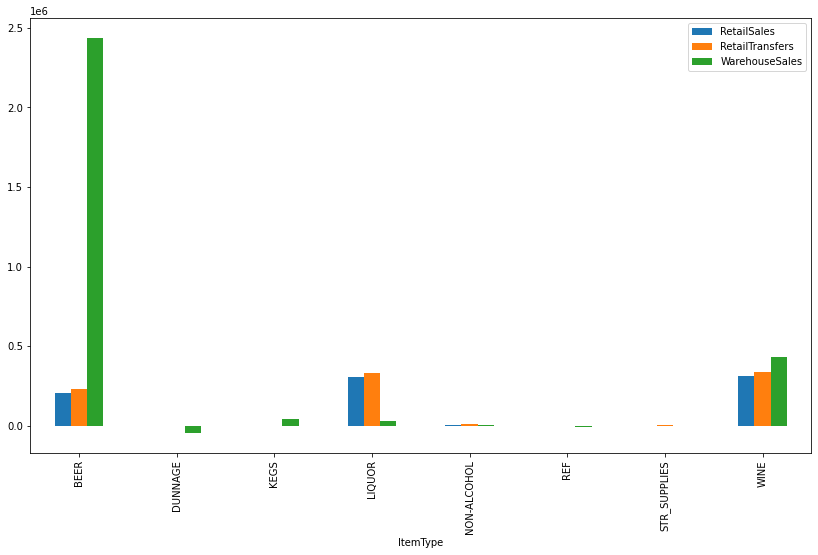

In [3]:
# or
grouped = data.groupby('ItemType').agg('sum')[['RetailSales', 'RetailTransfers', 'WarehouseSales']]
grouped.plot.bar(figsize=(14,8))
plt.show()

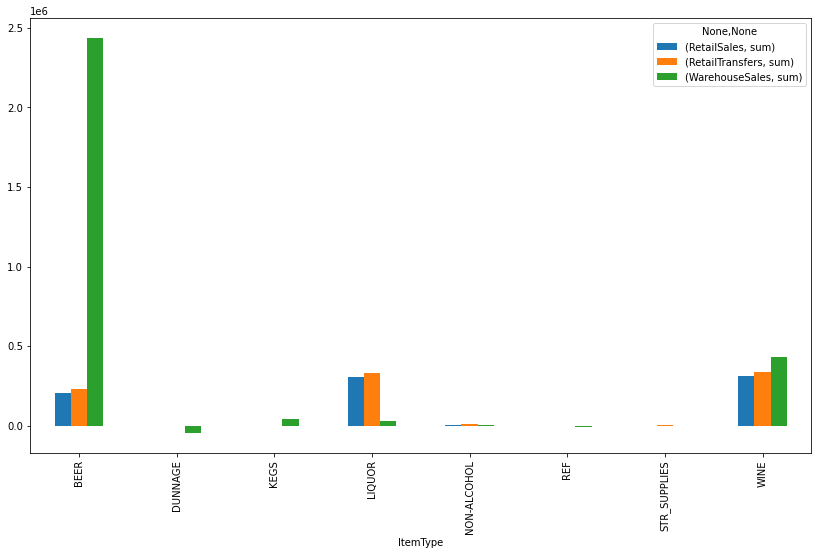

In [7]:
# or
grouped = data.groupby(['ItemType']) [['RetailSales', 'RetailTransfers', 'WarehouseSales']].agg(['sum'])
grouped.plot.bar(figsize=(14,8))
plt.show()

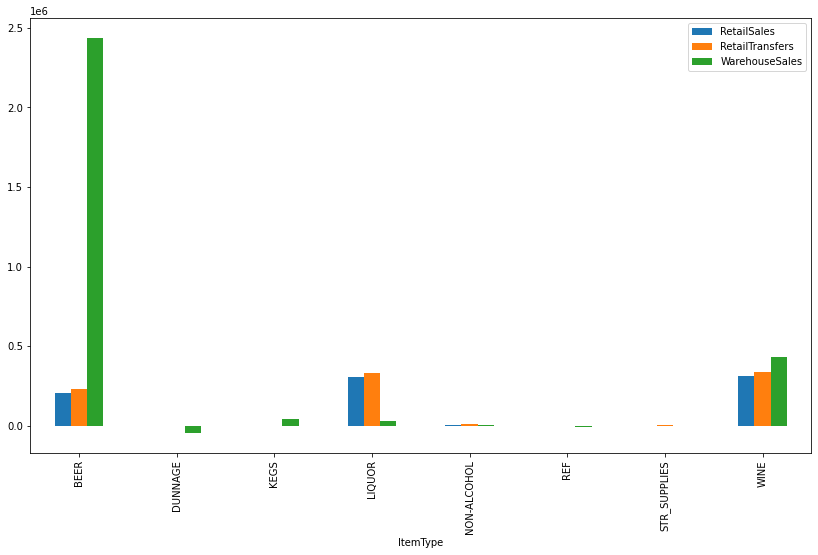

In [9]:
# or
grouped = data.groupby(['ItemType']).agg({'RetailSales':'sum','RetailTransfers':'sum', 'WarehouseSales':'sum'})
grouped.plot.bar(figsize=(14,8))
plt.show()

## 2. Create a bar chart showing total Retail Sales for the top 10 suppliers with the most total sales. 

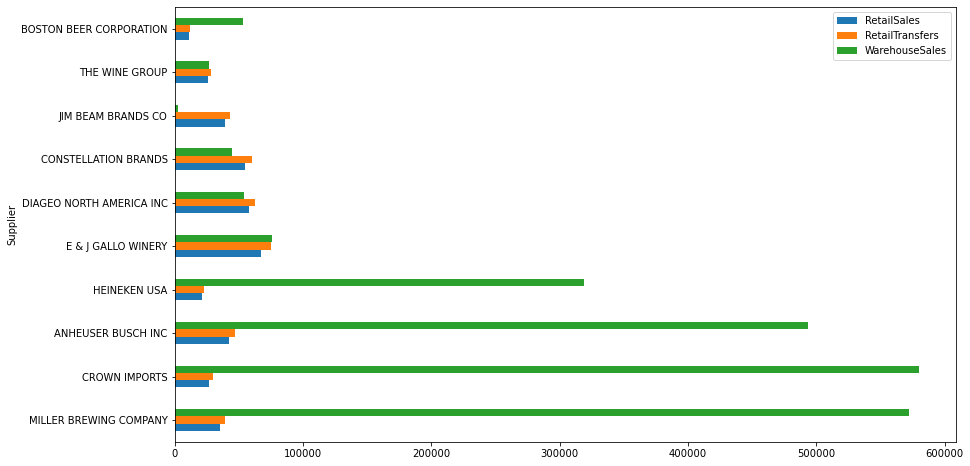

In [12]:
grouped = data.groupby('Supplier').agg('sum')[['RetailSales', 'RetailTransfers', 'WarehouseSales']]
grouped['TotalSales'] = grouped.sum(axis=1)
top10 = grouped.sort_values('TotalSales', ascending=False).head(10)
top10.drop('TotalSales', axis=1).plot.barh(figsize=(14,8))
plt.show ()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

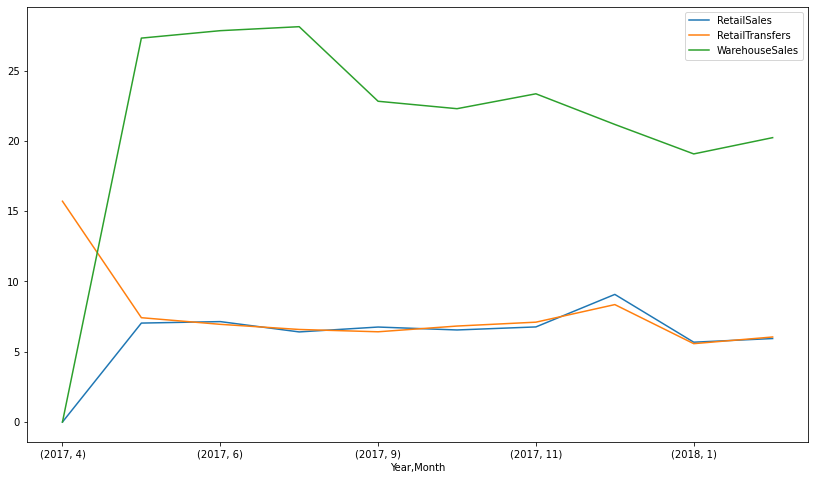

In [13]:
grouped = data.groupby(['Year', 'Month']).agg('mean')
grouped.plot(figsize=(14,8))
plt.show()

## 4. Plot the same information as above but as a bar chart.

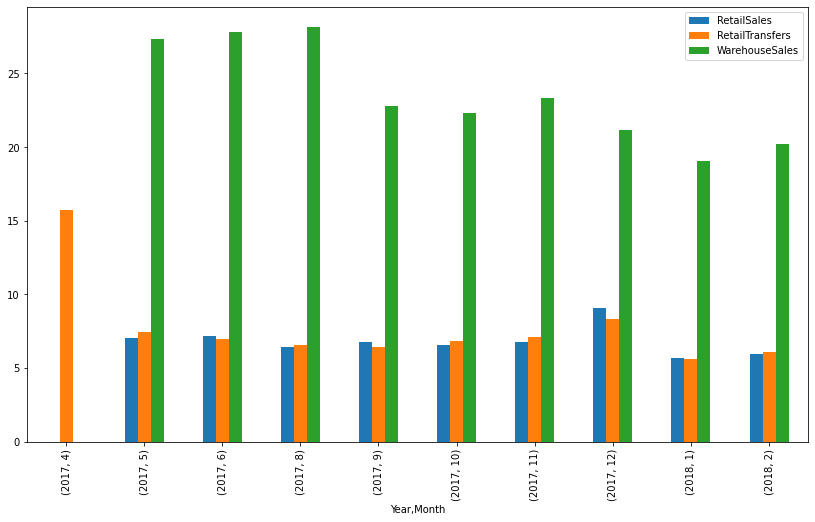

In [16]:
grouped.plot.bar(figsize=(14,8))
plt.show()